# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 

z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

Za pomocą funkcji [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) przy wykorzystaniu dwóch metod **RK45** i **RK23** rozwiąż poniższe przykady:

***Zadanie 1.*** 

Rozwiąż równanie $\dot{x}(t)=\frac{x+t}{x-t}$, $x(0)=1$ (równanie to posiada rozwiązanie dokładne $x(t)=t+\sqrt{1+2t^2}$). Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


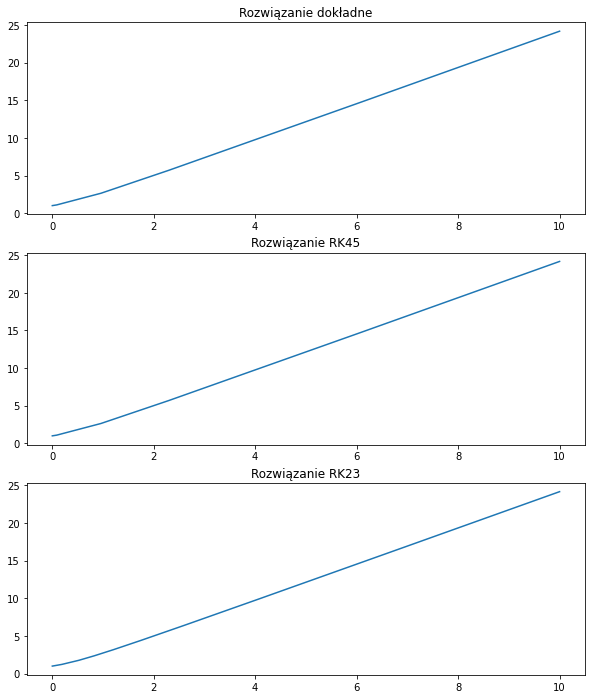

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

#Funkcja dokładna
f_exact = lambda t : t + np.sqrt(1+2*t**2)

#Prawa strona równania różniczkowego
fun = lambda t,x : (x+t)/(x-t) # 

#Przedział dla którego szukamy rozwiązania oraz warunek początkowy
t_span = np.array([0, 10])
y0 = np.array([1.0])

#Użycie solverów w celu obliczenia rozwiązań
sol_45 = solve_ivp(fun,t_span,y0,method='RK45')
sol_23 = solve_ivp(fun,t_span,y0,method='RK23')

#Tworzę subploty
fig = plt.figure(figsize = [10, 12])
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

#Rozwiązanie dokładne
ax1.plot(sol_45.t,f_exact(sol_45.t))
ax1.set(title='Rozwiązanie dokładne')

#Rozwiązanie RK45
ax2.plot(sol_45.t,sol_45.y.T)
ax2.set(title='Rozwiązanie RK45')

#Rozwiązanie RK23
ax3.plot(sol_23.t,sol_23.y.T)
ax3.set(title='Rozwiązanie RK23')


plt.show()

### Wnioski na końcu sprawozdania.

***Zadanie 2.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

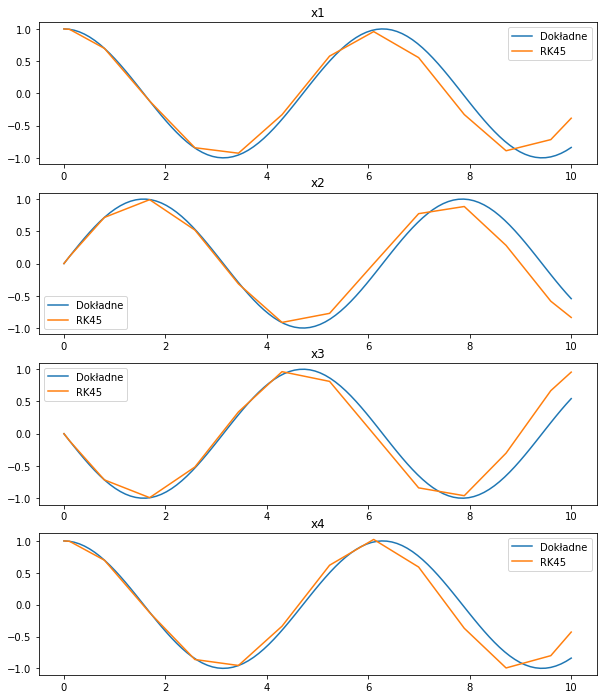

In [2]:
def right_side(t, x):
    dx1 = x[2]
    dx2 = x[3]
    dx3 = - x[0] / (x[0]**2 + x[1] **2)**(3/2)
    dx4 = - x[1] / (x[0]**2 + x[1] **2)**(3/2)
    return np.array([dx1,dx2,dx3,dx4])

def f_exact(t):
    return np.array([np.cos(t),np.sin(t),-np.sin(t),np.cos(t)])


#Przedział dla którego szukamy rozwiązania oraz warunek początkowy
t_span = np.array([0, 10])
x0 = np.array([1,0,0,1]) #.T?

#Użycie solverów w celu obliczenia rozwiązań
sol = solve_ivp(right_side,t_span,x0,method='RK45')
t = sol.t
x1 = sol.y[0]
x2 = sol.y[1]
x3 = sol.y[2]
x4 = sol.y[3]


#ROZW. DOKŁADNE
time = np.linspace(t_span[0],t_span[1],100)
exact = f_exact(time)

#Tworzę subploty
fig = plt.figure(figsize = [10, 12])
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

#RK45: x1
ax1.plot(time,exact[0],label='Dokładne')
ax1.plot(t,x1,label='RK45')
ax1.set(title='x1')
ax1.legend()

#RK45: x2
ax2.plot(time,exact[1],label='Dokładne')
ax2.plot(t,x2,label='RK45')
ax2.set(title='x2')
ax2.legend()

#RK45: x3
ax3.plot(time,exact[2],label='Dokładne')
ax3.plot(t,x3,label='RK45')
ax3.set(title='x3')
ax3.legend()

#RK45: x4
ax4.plot(time,exact[3],label='Dokładne')
ax4.plot(t,x4,label='RK45')
ax4.set(title='x4')
ax4.legend()


plt.show()

### Wnioski na końcu sprawozdania.

***Zadanie 3.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

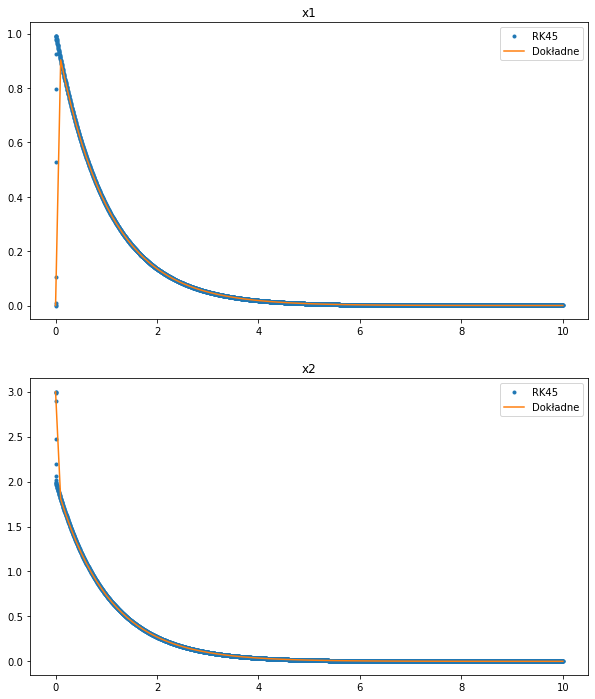

In [3]:
def right_side(t, x):
    dx1 = -667*x[0]+333*x[1]
    dx2 = 666*x[0]-334*x[1]
    return np.array([dx1,dx2])

#Dokładne rozwiązanie

def exact(x):
    return np.array([np.exp(-x)-np.exp(-1000*x), np.exp(-1000*x) + 2*np.exp(-x)])

time = np.linspace(0,10,100)
exact_s = exact(time)

#Przedział dla którego szukamy rozwiązania oraz warunek początkowy
t_span = np.array([0, 10])
x0 = np.array([0,3]) #.T?

#Użycie solverów w celu obliczenia rozwiązań

#RK45
sol = solve_ivp(right_side,t_span,x0,method='RK45')
t = sol.t
x1 = sol.y[0]
x2 = sol.y[1]




#ROZW. DOKŁADNE
time = np.linspace(t_span[0],t_span[1],100)
exact = f_exact(time)

#Tworzę subploty
fig = plt.figure(figsize = [10, 12])
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


#RK45: x1

ax1.plot(t,x1,'.',label='RK45')
ax1.plot(time,exact_s[0],label='Dokładne')
ax1.set(title='x1')
ax1.legend()

#RK45: x2

ax2.plot(t,x2,'.',label='RK45')
ax2.plot(time,exact_s[1],label='Dokładne')
ax2.set(title='x2')
ax2.legend()


plt.show()

### Wnioski na końcu sprawozdania.

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1+\mu'}{D_2}\\
\dot{x_3}(t)x_4(t)\\
\dot{x_4}(t)=x_3-2x_2-\mu'\frac{x_3}{D_1}
-\mu\frac{x_3}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1+\mu)^2+{x_3}^2)^\frac{3}{2}\\
D_2=((x_1-\mu')^2+{x_3}^2)^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

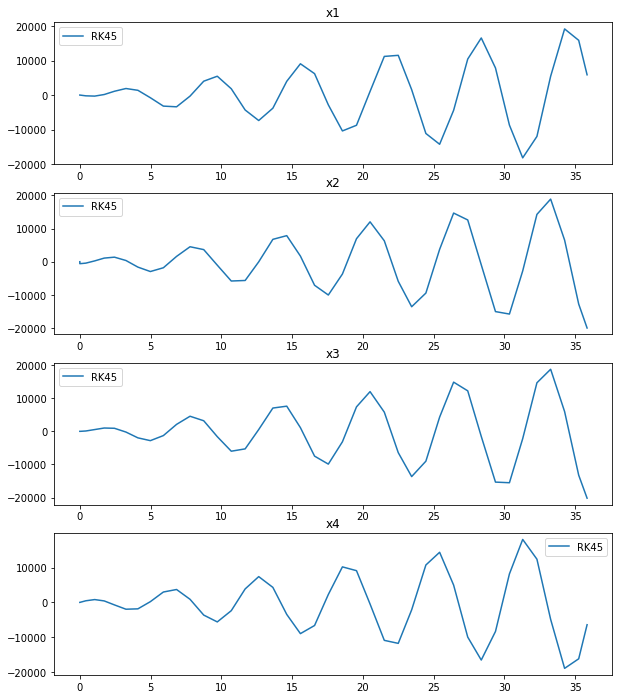

In [4]:
#PRAWA STRONA RÓWNANIA RÓŻNICZKOWEGO
def right_side(t,x):
    mi = 0.012277471
    mi_p = 1 - mi
    
    D1 = ((x[0]+mi)**2 + x[2]**2)**(3/2)
    D2 = ((x[0] - mi_p)**2+x[2]**2)**(3/2)

    dx1 = x[1]
    dx2 = x[0]+2*x[3]-mi_p*(x[0]+mi)/D1-mi*(x[0]+mi_p)/D2
    dx3 = x[3]
    dx4 = x[2] - 2*x[1] - mi_p*x[2]/D1 - mi*x[2]/D2 #TU BŁĄD

    return np.array([dx1, dx2, dx3, dx4])


#DEFINIOWANIE PARAMETRÓW DO FUNKCJI solve_ivp
T = 17.0652165601579625588917206249
t_span = np.array([0, 2.1*T])
x0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])

#ROZWIĄZANIE ZA POMOCĄ RK45
sol = solve_ivp(right_side,t_span,x0,method='RK45')
t = sol.t
x1 = sol.y[0]
x2 = sol.y[1]
x3 = sol.y[2]
x4 = sol.y[3]

#WYNIKI

#Tworzę subploty
fig = plt.figure(figsize = [10, 12])
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

#RK45: x1
ax1.plot(t,x1,label='RK45')
ax1.set(title='x1')
ax1.legend()

#RK45: x2
ax2.plot(t,x2,label='RK45')
ax2.set(title='x2')
ax2.legend()

#RK45: x3
ax3.plot(t,x3,label='RK45')
ax3.set(title='x3')
ax3.legend()

#RK45: x4
ax4.plot(t,x4,label='RK45')
ax4.set(title='x4')
ax4.legend()

plt.show()

## WNIOSKI:

### ZADANIE 1: 
Dla wybranego przeze mnie przedziału T_span wynoszącego 0-10 funkcja solve_ivp działa bardzo dobrze zarówno dla Rungego-Kutty 45 jak i dla Rungego-Kutty 23. 

### ZADANIE 2: 
Od razu widać, że wyniki uzyskane w zadaniu drugim są znacznie gorsze od tych uzyskanych w zadaniu pierwszym. W Zadaniu drugim do rozwiązania zamiast zwykłego równania różniczkowego mieliśmy układ równań. Najprawdopodobniej właśnie to spowodowało, że wyniki są gorsze i dużo bardziej różnią się od funkcji dokładnej niż te z zadania pierwszego. Może to być także spowodowane tym, że podane funkcje są cięższe do policzenia. Warto jednak dodać, że odwzorowanie nie jest tragiczne i można się z niego domyślać o jakie funkcje dokładne chodzi.

### ZADANIE 3:
Solver w tym przypadku sprawuje się bardzo przyzwoicie. Wyniki praktycznie idealnie odwzorowują przebieg dokładnej funkcji, którą udało mi się znaleźć za pomocą narzędzia "Wolfram". Warto zauważyć, że solver wywołał prawą stronę równania znacznie więcej razy (ponad 21 000) a w żadnym z poprzednich zadań liczba ta nie przekroczyła 200. Nie mniej jednak wynik jest bardzo satysfakcjonujący.

### ZADANIE 4:
Zadanie pokazuje, że solver solve_ivp a także ogólnie równania różniczkowe możemy wykorzystywać do rozwiązywania rzeczywistych problemów, np. natury fizycznej. W tym przypadku chcięliśmy znaleźć funkcje opisujące prędkości i przemieszczenia. Otrzymane funkcje powinny być okresowe, jednak nie są. Może być to spowodowane różnymi przybliżeniami, które przyjęliśmy przy stawianiu problemu, przez obcięcia spowodowane dokładnością numeryczną bądź z innych powodów, które niestety ciężko jest mi zidentyfikować.

### WNIOSKI OGÓLNE:
Można zauważyć, że w innych językach programowania także spotykamy się z podobnymi solverami. Dobrym przykładem wydaje się być Matlab, który posiada funkcje takie jak ode23, ode45, które także przyjmują podobne parametry (uchwyt do funkcji, czas symulacji, warunki początkowe) i działają na tej samej zasadzie czyli metodzie Rungego-Kutty. Dzięki temu, że w Matlabie rozwiązywaliśmy już takie problemy dużo łatwiej było nam przenieść to do języka Python.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
